In [1]:
from fastai.vision.all import *
from fastbook import *
from fastai.vision.widgets import *
import os

In [2]:
def khachapuri_type(x): return x[0].isupper()

path = Path('images')
fns = get_image_files(path)
fns

(#452) [Path('images/guruli/guruli73.jpg'),Path('images/guruli/guruli66.jpg'),Path('images/guruli/guruli70.jpg'),Path('images/guruli/guruli65.jpg'),Path('images/guruli/guruli61.jpg'),Path('images/guruli/guruli75.jpg'),Path('images/guruli/guruli49.jpg'),Path('images/guruli/guruli74.jpg'),Path('images/guruli/guruli60.jpg'),Path('images/guruli/guruli88.jpg')...]

In [3]:
failed = verify_images(fns)
failed

(#0) []

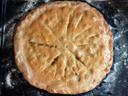

In [4]:
dest = 'images/kubdari/kubdari26.jpg'
im = Image.open(dest)
im.to_thumb(128,128)

In [ ]:
failed.map(Path.unlink)
failed

In [ ]:
fns

In [5]:
khachapuri = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

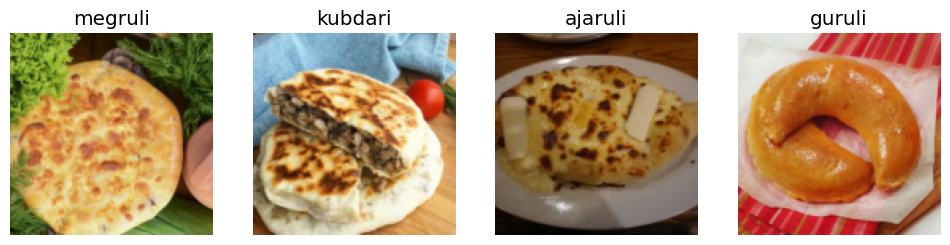

In [6]:
dls = khachapuri.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [7]:
# PYTORCH_ENABLE_MPS_FALLBACK=1



khachapuri = khachapuri.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5))
    #batch_tfms=aug_transforms())
dls = khachapuri.dataloaders(path)

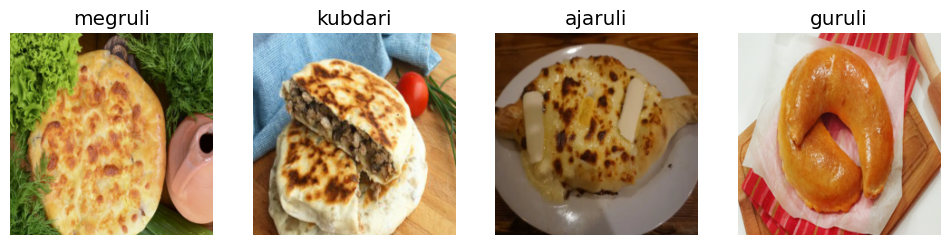

In [8]:
dls.valid.show_batch(max_n=4, nrows=1)

In [9]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

/opt/miniconda3/envs/ML/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/miniconda3/envs/ML/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,3.130332,2.201302,0.677778,00:08


epoch,train_loss,valid_loss,error_rate,time
0,1.905738,1.479470,0.466667,00:08
1,1.680350,1.071718,0.377778,00:08
2,1.407027,0.883543,0.266667,00:07
3,1.172829,0.780980,0.255556,00:07
4,0.967757,0.744376,0.233333,00:07
5,0.815569,0.749314,0.222222,00:08
6,0.696136,0.749345,0.222222,00:07
7,0.600444,0.745655,0.200000,00:08
8,0.523350,0.732022,0.200000,00:07
9,0.464446,0.736978,0.200000,00:07


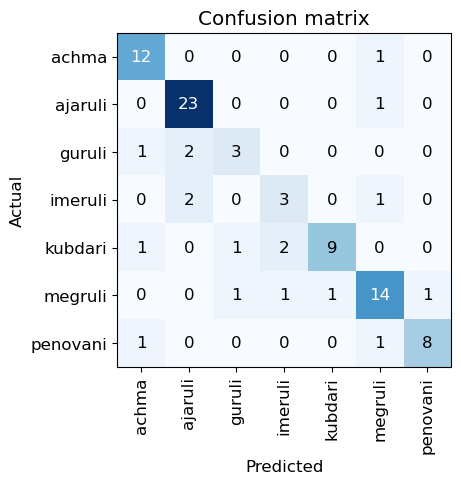

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

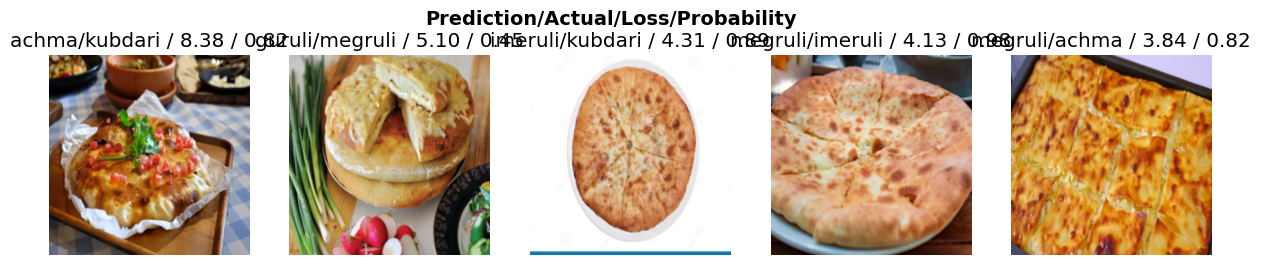

In [11]:
interp.plot_top_losses(5, nrows=1)


In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)
     

In [12]:
learn.export('khachapuri_classifier.pkl')